# Tests

In [1]:
import wntr
import os



Create a water network model

In [2]:
base_path = r'C:\Users\wij\Desktop\Inżynierka\WTNR-pipe-leak-detection-main'
inp_file = 'Walkerton_v1.inp'
inp_file = os.path.join(base_path, inp_file)


wn = wntr.network.WaterNetworkModel(inp_file)

Graph the network

(<matplotlib.collections.PathCollection at 0x22d39869588>,
 <matplotlib.collections.LineCollection at 0x22d39869d08>)

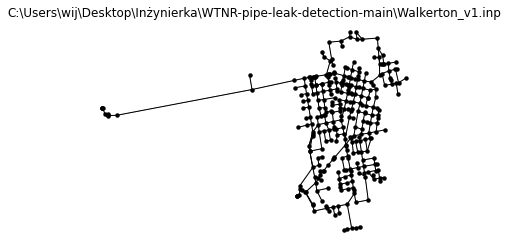

In [3]:
wntr.graphics.plot_network(wn, title=wn.name)

Simulate hydraulics

In [4]:
sim = wntr.sim.EpanetSimulator(wn)
results = sim.run_sim()

UnicodeEncodeError: 'ascii' codec can't encode character '\u017c' in position 35: ordinal not in range(128)

Plot pressure map at 5hrs

In [ ]:
pressure_at_5hr = results.node['pressure'].loc[5*3600, :]
wntr.graphics.plot_network(wn, node_attribute = pressure_at_5hr, node_size=30, title='Pressure at 5 hours')

Measurements every 3600s (1h), time defined in 'name' column

In [ ]:
results.node['pressure']

How a node pressure is changing over time

In [ ]:
J5node_series = results.node['pressure'].loc[:, 'J5']
graph = J5node_series.plot()
graph.set_xlabel('Time [s]')
graph.set_ylabel('Pressure [m]')

What is measured for nodes?

In [ ]:
for thing in results.node:
    print(thing)

What data does a node object hold?

In [ ]:
for node in wn.nodes():
    print(node)

In [ ]:
for pipe in wn.pipes():
    print(pipe)

In [ ]:
for junction in wn.junctions():
    print(junction)

How to get node coordinates?

In [ ]:
J63_node = wn.get_node('J63')
J63_node.coordinates

In [ ]:
J63_node = wn.get_node('J64')
J63_node.coordinates

How to find out which nodes are closest to a chosen one?

In [ ]:
from math import sqrt

def distance_between_points(x1: float, y1: float, x2: float, y2: float) -> float:
    """
    Returns distance between 2 points on a flat plane
    Arguments: x1, y1 - first point coordinates (floats)
               x2, y2 - second point coordinates (floats)
    Returns: distance on a flat plane (float)
    """
    return sqrt(((x1 - x2)**2) + ((y1 - y2)**2))

def get_closest_nodes(water_network: wntr.network.WaterNetworkModel, base_node_name: str, max_distance: float) -> list:
    """
    Finds nodes that are closest to base_node
    Arguments: water_network - WNTR Water Network Model (wntr.network.WaterNetworkModel)
               base_node_name - reference node name (str)
               max_distance - units in meters (float)
    Returns:   list of strings (names of closest nodes)
    """
    closest_nodes = []
    
    # get base node coordinates
    x_base, y_base = wn.get_node(base_node_name).coordinates
    
    # check each node if it's in base node's proximity
    for node_name in wn.node_name_list:
        x, y = wn.get_node(node_name).coordinates
        if distance_between_points(x_base, y_base , x, y) <= max_distance:
            closest_nodes.append(node_name)
            
    # remove the base node from return list (distance from itself is always 0)
    closest_nodes.remove(base_node_name)
    
    return closest_nodes

closest_nodes = get_closest_nodes(water_network = wn,
                                  base_node_name = 'J63',
                                  max_distance = 400.0)

for node in closest_nodes:
    print(node)